# 数据探索

## 数据查看

### 工具导入

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
import time
from datetime import datetime,timedelta


plt.rcParams['font.sans-serif'] = ['SimHei']   #解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决中文显示问题

### 数据读取

In [2]:
data=pd.read_csv('lizhiyuce.csv')

### 数据样例

In [18]:
data.head()

,Unnamed: 0,工号,员工类型,离职类型,申请时间,确认时间,数据日期,消息发送,消息接收,在线文档被查阅总数,...,最新离职生效时间,最新全转专日期,最新异动日期,最近一次入职时间,当周考勤打卡次数,当周应出勤天数,当周外勤打卡次数,人员类型,离职时间与当前时间差值,是否离职
0,0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,全职员工,被动离职,NaN,2021-12-31,2021-01-03,114.0,166.20,0.0,...,2021-12-31,NaN,2021-09-01,2019-01-28,0.0,1.0,0.0,201,-1000000,2
1,1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-04-25,214.0,227.10,2.0,...,2021-10-01,NaN,2020-10-01,2004-05-01,0.0,2.0,0.0,112,129,0
2,2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-06-27,71.0,107.50,0.0,...,2021-10-01,NaN,2020-10-01,2004-05-01,6.0,5.0,0.0,112,66,0
3,3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-08-29,56.0,78.00,0.0,...,2021-10-01,,2020-10-01,2004-05-01,0.0,5.0,0.0,112,3,3
4,4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,全职员工,NaN,NaN,NaN,2022-02-20,37.0,62.16,5.0,...,NaN,NaN,2022-01-01,2004-07-01,0.0,0.0,0.0,0,9999,0


### 数据基本信息

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547632 entries, 0 to 4547631
Data columns (total 65 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   工号           object 
 2   员工类型         object 
 3   离职类型         object 
 4   申请时间         object 
 5   确认时间         object 
 6   数据日期         object 
 7   消息发送         float64
 8   消息接收         float64
 9   在线文档被查阅总数    float64
 10  在线文档被编辑总数    float64
 11  在线文档被评论总数    float64
 12  在线文档被收藏总数    float64
 13  周报被阅读总数      float64
 14  周报被点赞总数      float64
 15  周报被评论总数      float64
 16  在线文档查阅总数     float64
 17  在线文档编辑总数     float64
 18  在线文档评论总数     float64
 19  在线文档收藏总数     float64
 20  周报阅读总数       float64
 21  周报点赞总数       float64
 22  周报评论总数       float64
 23  知音楼日均在线      float64
 24  请假总天数        float64
 25  周报字数         float64
 26  音视频会议参与总时长   float64
 27  音视频会议参与总数    float64
 28  日程参与总数       float64
 29  日程参与总时长      float64
 30  线文档主被动评论人数   float64
 31  线文档主被动编辑人数   float64
 32

## 数据压缩

In [20]:
def check_smallest_dtype(df,cat_col=[]):
    numerics=['int16','int32','int64','float16','float32','float64']
    smallest_dtype={}
    for col in df.columns:
        col_type=df[col].dtypes
        if col_type in numerics:
            c_min=df[col].min()
            c_max=df[col].max()
            if str(col_type)[:3]=='int':
                if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
                    smdp='int8'
                elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
                    smdp='int16'
                elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
                    smdp='int32'
                elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
                    smdp='int64'
            if str(col_type)[:5]=='float':
                if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
                    smdp='float16'
                elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
                    smdp='float32'
                else:
                    smdp='float64'
        else:
            if col in cat_col:
                smdp='category'
            else:
                smdp=col_type
        smallest_dtype[col]=smdp
    return smallest_dtype

In [21]:
ct_data=check_smallest_dtype(data)
#ct_data

### 数据重新读取

In [49]:
# data=pd.read_csv('lizhiyuce.csv',dtype=ct_data)
data=pd.read_csv('lizhiyuce.csv')
#data.info()

## 判定是否离职

In [9]:
#定义人员类型
def people_type(x):
    if pd.isna(x['离职类型']) and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):#判断是否为空值
        return '000'
    elif pd.isna(x['离职类型']) and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '001'
    elif pd.isna(x['离职类型']) and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '010'
    elif pd.isna(x['离职类型']) and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        return '011'
    elif x['离职类型'] == '主动离职' and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):
        return '100'
    elif x['离职类型'] == '主动离职' and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '110'
    elif x['离职类型'] == '主动离职' and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '101'
    elif x['离职类型'] == '主动离职' and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        if x['申请时间'] > x['确认时间']:
            return '121'
        else:
            return '112'
    elif x['离职类型'] == '被动离职' and pd.isna(x['申请时间']) and pd.isna(x['确认时间']):
        return '200'
    elif x['离职类型'] == '被动离职' and pd.notna(x['申请时间']) and pd.isna(x['确认时间']):
        return '210'
    elif x['离职类型'] == '被动离职' and pd.isna(x['申请时间']) and pd.notna(x['确认时间']):
        return '201'
    elif x['离职类型'] == '被动离职' and pd.notna(x['申请时间']) and pd.notna(x['确认时间']):
        return '211'
    else:
        return '待定'

# 填补申请时间
def fill_date(x):
    if x['人员类型'] in ['000','001','112','211','201','010','011','121']:
        return x['申请时间']
    elif x['人员类型'] in ['101','201']:
        return str((pd.to_datetime(x['确认时间']))-datetime.timedelta(days=30))[:10]

# 计算差值
def diff_date(x):
    if x['人员类型'] in ['000', '011', '001', '010']:# 认为在职
        return 9999
    elif x['人员类型'] in ['112', '211']:  #
        t = (pd.to_datetime(x['申请时间']) - pd.to_datetime(x['数据日期'])).days
        return t
    else:  # 201,121
        return -1000000

# 定义是否离职
def is_not_leave(x,not_day = 30+30,is_day = 30,dis_day = 0):
    if x>not_day:
        return 0 # 否
    elif x>is_day:
        return 1 #是
    elif x<=dis_day:
        return 2 #'舍弃'
    else :
        return 3 #'待定'

# 人员类型
data['人员类型'] = data.apply(lambda data:people_type(data),axis =1)
# 申请时间
data['申请时间'] = data.apply(lambda data:fill_date(data),axis= 1)

# 计算离职申请时间和数据日期差值
data['离职时间与当前时间差值'] = data.apply(lambda data:diff_date(data),axis =1)

# 定义是否离职
data['是否离职'] = data['离职时间与当前时间差值'].apply(lambda data:is_not_leave(data))


In [10]:
data.head(5)

,工号,员工类型,离职类型,申请时间,确认时间,数据日期,消息发送,消息接收,在线文档被查阅总数,在线文档被编辑总数,...,最新离职生效时间,最新全转专日期,最新异动日期,最近一次入职时间,当周考勤打卡次数,当周应出勤天数,当周外勤打卡次数,人员类型,离职时间与当前时间差值,是否离职
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,全职员工,被动离职,NaN,2021-12-31,2021-01-03,114.0,166.25000,0.0,0.0,...,2021-12-31,NaN,2021-09-01,2019-01-28,0.0,1.0,0.0,201,-1000000,2
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-04-25,214.0,227.12500,2.0,0.0,...,2021-10-01,NaN,2020-10-01,2004-05-01,0.0,2.0,0.0,112,129,0
2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-06-27,71.0,107.50000,0.0,0.0,...,2021-10-01,NaN,2020-10-01,2004-05-01,6.0,5.0,0.0,112,66,0
3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,全职教师,主动离职,2021-09-01,2021-10-01,2021-08-29,56.0,78.00000,0.0,0.0,...,2021-10-01,,2020-10-01,2004-05-01,0.0,5.0,0.0,112,3,3
4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,全职员工,NaN,NaN,NaN,2022-02-20,37.0,62.15625,5.0,2.0,...,NaN,NaN,2022-01-01,2004-07-01,0.0,0.0,0.0,000,9999,0


In [11]:
#data.to_csv('lizhiyuce.csv')

## 缺失值&离群值

### 查看

In [15]:
def check_na(data):
        null_val_sums = data.isnull().sum() +data.isin(['空']).sum()#统计每个列有多少缺失值

        per_null = list(null_val_sums.values / len(data))  #计算缺失率
        total = 0
        for ele in range(0, len(per_null)):
            total = total + per_null[ele]
        
        if total == 0:
            print('所有变量无缺失值')
        else:
            for i in range(len(per_null)):
                if per_null[i]!=0:
                    print(list(data)[i],per_null[i])
                    
        return 
check_na(data)

离职类型 0.15725
申请时间 0.52007
确认时间 0.15416
消息发送 0.13151
消息接收 0.13151
在线文档被查阅总数 0.13151
在线文档被编辑总数 0.13151
在线文档被评论总数 0.13151
在线文档被收藏总数 0.13151
周报被阅读总数 0.13151
周报被点赞总数 0.13151
周报被评论总数 0.13151
在线文档查阅总数 0.13306
在线文档编辑总数 0.13306
在线文档评论总数 0.13306
在线文档收藏总数 0.13306
周报阅读总数 0.13306
周报点赞总数 0.13306
周报评论总数 0.13306
知音楼日均在线 0.13558
请假总天数 0.13191
周报字数 0.71716
音视频会议参与总数 0.71148
日程参与总数 0.57949
日程参与总时长 0.57949
线文档主被动评论人数 0.13151
线文档主被动编辑人数 0.13151
线文档主被动阅读人数 0.13151
消息沟通人数 0.13151
创建文档数 0.86256
文档沟通人数 0.13151
日程沟通人数 0.13151
会议沟通人数 0.13151
周报沟通人数 0.13151
语音电话时长m 0.77921
语音电话沟通人数 0.77921
性别 0.02971
婚姻状况 0.02966
最高学历学历 0.19283
工龄(年) 0.02952
标准职级描述 0.02952
职务族描述 0.02952
当前在岗时长(月) 0.02952
司龄(月) 0.02952
最近一次绩效 0.72634
最新离职申请提交时间 0.64962
最新离职生效时间 0.18323
最新全转专日期 0.86326
最新异动日期 0.21591
最近一次入职时间 0.02952
当周考勤打卡次数 0.02953
当周应出勤天数 0.02953
当周外勤打卡次数 0.02953


缺失率较高特征：申请时间、周报字数、音视频会议参与总数、日程参与总数、日程参与总时长、创建文档数、语音电话时长m、语音电话沟通人数、最近一次绩效、最新离职申请提交时间、最新全转专日期

In [3]:
data=data.drop(labels=['Unnamed: 0','离职类型','申请时间','确认时间','周报字数','音视频会议参与总数','日程参与总数','日程参与总时长','创建文档数','语音电话时长m',
                       '语音电话沟通人数','最近一次绩效','最新离职申请提交时间','最新全转专日期'],axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547632 entries, 0 to 4547631
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   工号           object 
 1   员工类型         object 
 2   数据日期         object 
 3   消息发送         float64
 4   消息接收         float64
 5   在线文档被查阅总数    float64
 6   在线文档被编辑总数    float64
 7   在线文档被评论总数    float64
 8   在线文档被收藏总数    float64
 9   周报被阅读总数      float64
 10  周报被点赞总数      float64
 11  周报被评论总数      float64
 12  在线文档查阅总数     float64
 13  在线文档编辑总数     float64
 14  在线文档评论总数     float64
 15  在线文档收藏总数     float64
 16  周报阅读总数       float64
 17  周报点赞总数       float64
 18  周报评论总数       float64
 19  知音楼日均在线      float64
 20  请假总天数        float64
 21  音视频会议参与总时长   float64
 22  线文档主被动评论人数   float64
 23  线文档主被动编辑人数   float64
 24  线文档主被动阅读人数   float64
 25  文档评论中心度      float64
 26  消息中心度        float64
 27  文档编辑中心度      float64
 28  文档阅读中心度      float64
 29  消息沟通人数       float64
 30  文档沟通人数       float64
 31  日程沟通人数       float64
 32

### 处理

In [5]:
#填补缺失值、处理异常值
def deal_outliers_deficiency(df):
    if df.dtypes=='float64':
        df2 = pd.array(df)
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        # 下阈值
        val_low = Q1 - 1.5 * IQR
        # 上阈值
        val_up = Q3 + 1.5 * IQR
        # print(Q1,Q3,IQR,val_up,val_low)
        # 正常值的均值
        sum = 0
        i = 0
        k = 0
        for item in df2:
            k += 1
            if (item > val_low) & (item < val_up):
                sum += item
                i += 1
        # print(sum)
        # print(i)
        if i == 0:
            normal_mean = sum / k
        else:
            normal_mean = sum / i

        j = 0
        for item in df2:
            # 异常值替换
            if (item < val_low) | (item > val_up):
                df2[j] = -1 #异常值用-1替换
            j += 1
        df2 = df2.fillna(0)  # nan的替换值0
        return df2
    elif df.dtypes == 'object':
        df2 = pd.array(df)
        df2 = df2.fillna(df.mode().iloc[0])  # 由于df.mode()返回frame，因此用iloc　安装行的index访问
        return df2
    elif df.dtypes == 'int64':
        df2 = pd.array(df)
        return df2

In [6]:
#储存列名
data_columns_name=data.columns.values
#data_columns_name

In [7]:
#对每列应用数据清洗函数
for item in tqdm.tqdm(data_columns_name):
    data[item]=deal_outliers_deficiency(data[item])

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [02:39<00:00,  3.13s/it]


In [8]:
data.to_csv('lizhiyuce1.csv')

# 特征工程

## 编码

In [9]:
data=pd.read_csv('lizhiyuce1.csv')

In [3]:
#data.isnull().any()

Unnamed: 0     False
工号             False
员工类型           False
消息发送           False
消息接收           False
在线文档被查阅总数      False
在线文档被编辑总数      False
在线文档被评论总数      False
在线文档被收藏总数      False
周报被阅读总数        False
周报被点赞总数        False
周报被评论总数        False
在线文档查阅总数       False
在线文档编辑总数       False
在线文档评论总数       False
在线文档收藏总数       False
周报阅读总数         False
周报点赞总数         False
周报评论总数         False
知音楼日均在线        False
请假总天数          False
音视频会议参与总时长     False
线文档主被动评论人数     False
线文档主被动编辑人数     False
线文档主被动阅读人数     False
文档评论中心度        False
消息中心度          False
文档编辑中心度        False
文档阅读中心度        False
消息沟通人数         False
文档沟通人数         False
日程沟通人数         False
会议沟通人数         False
周报沟通人数         False
性别             False
婚姻状况           False
最高学历学历         False
工龄(年)          False
标准职级描述         False
职务族描述          False
当前在岗时长(月)      False
司龄(月)          False
最新离职生效时间       False
最新异动日期         False
最近一次入职时间       False
当周考勤打卡次数       False
当周应出勤天数        False
当周外勤打卡次数     

In [10]:
#员工类型
Emptype_dict={'兼职员工':1,
             '兼职教师':2,
             '在编实习':3,
             '全职员工':4,
             '全职教师':5,
             '专职教师':6,
            }
data['员工类型_Ordinal']=data['员工类型'].map(Emptype_dict)

In [11]:
#性别
Gender_dict={'男':0,
             '女':1
            }
data['性别_Ordinal']=data['性别'].map(Gender_dict)

In [12]:
#婚姻状况
Marry_dict={'未知':1,
             '离异':2,
            '未婚':3,
            '已婚':4
            }
data['婚姻状况_Ordinal']=data['婚姻状况'].map(Marry_dict)

In [13]:
#最高学历学历
Edu_dict={'':-1,
         '01 - 博士后':3,
         '01-博士后':3,
         '02-博士研究生':3,
         '02 - 博士研究生':3,
         '03 - 硕士研究生':3,
         '03-硕士研究生':3,
         '04-本科':2,
         '04 - 本科':2,
         '05-大专':1,
         '05 - 大专':1,
         '06 - 高中':1,
         '06-高中':1,
         '07-中专/技校':0,
         '07 - 中专/技校':0,
         '08 - 初中':0,
         '08-初中':0,
         '09 - 小学及以下':0,
         '09-小学及以下':0
         }
data['最高学历学历_Ordinal']=data['最高学历学历'].map(Edu_dict)

In [14]:
#职务族描述
Pos_dic={'教研':1,
         '综合管理':2,
         '教师':3,
         '专业支持':4,
         '教学':5,
         '运营服务':6,
         '技术':7,
         '销售':8,
         '产品':9,
         '市场与公关':10,
         '市场营销':11,
         '学科':12, 
}
data['职务族描述_Ordinal']=data['职务族描述'].map(Pos_dic)

In [15]:
data['司龄(月)']=pd.to_numeric(data['司龄(月)'],errors='coerce')
data['司龄(月)'].fillna(data['司龄(月)'].median(),inplace=True)

In [16]:
data=data.drop(['员工类型','性别','职务族描述','最高学历学历','婚姻状况'],axis=1)
data.shape

(4547632, 52)

In [18]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
#data.head(5)

,工号,数据日期,消息发送,消息接收,在线文档被查阅总数,在线文档被编辑总数,在线文档被评论总数,在线文档被收藏总数,周报被阅读总数,周报被点赞总数,...,当周应出勤天数,当周外勤打卡次数,人员类型,离职时间与当前时间差值,是否离职,员工类型_Ordinal,性别_Ordinal,婚姻状况_Ordinal,最高学历学历_Ordinal,职务族描述_Ordinal
0,ad621a23bd5c2474c1fe0909a8a38bb5fcccd382e855f9...,2021-01-03,114.0,166.20,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,201,-1000000,2,4,0,4,2.0,1
1,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-04-25,214.0,227.10,-1.0,0.0,0.0,0.0,-1.0,0.0,...,2.0,0.0,112,129,0,5,0,4,2.0,2
2,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-06-27,71.0,107.50,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,112,66,0,5,0,4,2.0,2
3,4250041a2c9a323864ef0d88195fa1d5a71aa837f78f7f...,2021-08-29,56.0,78.00,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,112,3,3,5,0,4,2.0,2
4,29a4ee71e3c86f7f4c1e73313529a5a01b378e9a088948...,2022-02-20,37.0,62.16,-1.0,-1.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,0,9999,0,4,0,4,2.0,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547632 entries, 0 to 4547631
Data columns (total 51 columns):
 #   Column          Dtype  
---  ------          -----  
 0   工号              object 
 1   数据日期            object 
 2   消息发送            float64
 3   消息接收            float64
 4   在线文档被查阅总数       float64
 5   在线文档被编辑总数       float64
 6   在线文档被评论总数       float64
 7   在线文档被收藏总数       float64
 8   周报被阅读总数         float64
 9   周报被点赞总数         float64
 10  周报被评论总数         float64
 11  在线文档查阅总数        float64
 12  在线文档编辑总数        float64
 13  在线文档评论总数        float64
 14  在线文档收藏总数        float64
 15  周报阅读总数          float64
 16  周报点赞总数          float64
 17  周报评论总数          float64
 18  知音楼日均在线         float64
 19  请假总天数           float64
 20  音视频会议参与总时长      float64
 21  线文档主被动评论人数      float64
 22  线文档主被动编辑人数      float64
 23  线文档主被动阅读人数      float64
 24  文档评论中心度         float64
 25  消息中心度           float64
 26  文档编辑中心度         float64
 27  文档阅读中心度         float64
 28  消息沟通人数      

In [21]:
data.drop(['离职时间与当前时间差值'],inplace=True,axis=1)

In [24]:
#data.to_csv('lizhiyuce2.csv')

## 数据拼接

# 生存分析

In [35]:
data=pd.read_csv('lizhiyuce2.csv')
data['数据日期']=pd.to_datetime(data['数据日期'])

In [36]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547632 entries, 0 to 4547631
Data columns (total 50 columns):
 #   Column          Dtype         
---  ------          -----         
 0   工号              object        
 1   数据日期            datetime64[ns]
 2   消息发送            float64       
 3   消息接收            float64       
 4   在线文档被查阅总数       float64       
 5   在线文档被编辑总数       float64       
 6   在线文档被评论总数       float64       
 7   在线文档被收藏总数       float64       
 8   周报被阅读总数         float64       
 9   周报被点赞总数         float64       
 10  周报被评论总数         float64       
 11  在线文档查阅总数        float64       
 12  在线文档编辑总数        float64       
 13  在线文档评论总数        float64       
 14  在线文档收藏总数        float64       
 15  周报阅读总数          float64       
 16  周报点赞总数          float64       
 17  周报评论总数          float64       
 18  知音楼日均在线         float64       
 19  请假总天数           float64       
 20  音视频会议参与总时长      float64       
 21  线文档主被动评论人数      float64       
 22  线文档主被动编辑人数      fl

In [4]:
data['工号'].unique().shape

(146797,)

In [37]:
df=data.groupby(by=['工号'])['数据日期'].min()
#df.head()

In [8]:
# data['当前在岗时长(月)'].unique()

array([10.,  7.,  9.,  1., 17., 12., -1., 16.,  3.,  6., 19.,  4., 11.,
       13., 14., 15., 23., 18., 20.,  5., 21.,  2.,  0., 22.,  8., 24.])

In [38]:
data=data.merge(df,how='left',on='工号')
#data.head()

In [39]:
def count_T(x):
    time_c=(x['数据日期_x']-x['数据日期_y']+timedelta(7)).days
    time_t=x['当前在岗时长(月)']*30
    time=min(time_c,time_t)  
    if time<0:
        time=0
    return time

In [40]:
data['T'] = data.apply(lambda data:count_T(data),axis =1)

In [15]:
#data['T'].head()

0      7.0
1    119.0
2    182.0
3    245.0
4     30.0
Name: T, dtype: float64

In [44]:
# data_sample1=data.loc[data['是否离职']==1]
# data_sample0=data.loc[data['是否离职']==0]

In [45]:
# data_sample0.shape

(1723274, 52)

In [46]:
# data_sample1.shape

(218072, 52)

In [47]:
# data_sample0=data_sample0.sample(n=218072)

In [48]:
# fin_data=pd.concat([data_sample0,data_sample1])

In [49]:
print(data['T'].min(), data['T'].max(),'\n')
print(data['是否离职'].value_counts(),'\n')
#print(data['group'].value_counts(),'\n')

0.0 574.0 

0    218072
1    218072
Name: 是否离职, dtype: int64 



     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   120.0                   120.0


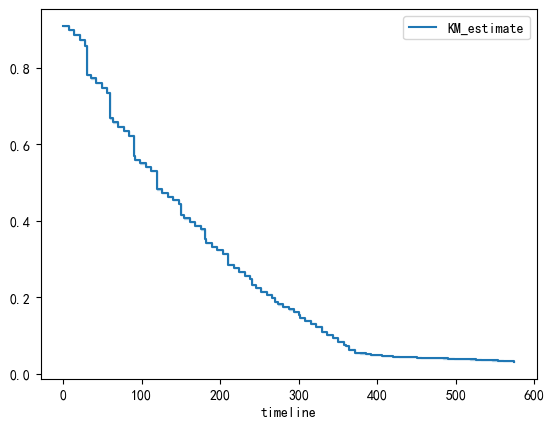

In [50]:
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

kmf = KaplanMeierFitter()
kmf.fit(data['T'], event_observed=data['是否离职'])

kmf.plot_survival_function()

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_confidence_interval_)


In [52]:
fin_data.drop(['工号'],inplace=True,axis=1)

In [54]:
# from lifelines import CoxPHFitter
# cph = CoxPHFitter()
# cph.fit(fin_data, 'T', event_col='是否离职')
# cph.print_summary()
